In [1]:
import numpy as np
import matplotlib.pyplot as plt
import histlite
from tqdm.notebook import tqdm
import seaborn as sns

import sys
sys.path.append('/p/lustre1/yu47/Sterile_Neutrino/sensitivity/')

from neutrino_source import neutrino_source
from detector import detector
from MC_generator import gen_LZ

A Cr51 hot neutrino source with nominal 100000.0 in xx years with neutrino energies [0.75] and branch ratios [1.0] is created.


In [2]:
# nEXO exp
source_nEXO = neutrino_source('Cr51', 1e5, [0.75], [1.0])
det_nEXO = detector('nEXO')
det_nEXO.update_geometry(1.183, 1.133)
det_nEXO.position = (0, 0, 0)
dist = 0.1
source_nEXO.position = (0, 0, -det_nEXO.height/2-dist)
det_nEXO.run_time = 100 # days


A Cr51 hot neutrino source with nominal 100000.0 in xx years with neutrino energies [0.75] and branch ratios [1.0] is created.


In [3]:
import MC_generator
import importlib
importlib.reload(MC_generator)

# no oscillation:
dm2, sin2theta_square = 0., 0.

import MC_generator
gen1 = MC_generator.MC_generator(source_nEXO, det_nEXO, dm2=dm2, sin2theta_square=sin2theta_square, int_type='CC'); 

A Cr51 hot neutrino source with nominal 100000.0 in xx years with neutrino energies [0.75] and branch ratios [1.0] is created.


In [4]:
gen_LZ.convolve_oscillation_event_rate(0.75)[0]

0.3712817512434532

In [53]:
print(f'Expected event number in nEXO detector (detector-source distance {np.abs(gen1.det.position[2] - gen1.source.position[2])} m) is {gen1.n_events}')
print(f'Expected event number in LZ   detector (detector-source distance {np.abs(gen_LZ.det.position[2] - gen_LZ.source.position[2])} m) is {gen_LZ.n_events}')

Expected event number in nEXO detector (detector-source distance 0.6915 m) is 9822.184866242162
Expected event number in LZ   detector (detector-source distance 1.69 m) is 12518.05904456353


In [34]:
pos, bl = gen1.generate_nonoscillate_Asimov_dataset()

gen1._set_dm2(0.0)
gen1._set_sin2theta_square(0.0)
osc_nu_pos, osc_bl = gen1.generate_oscillate_Asimov_dataset(0.75)
print(len(osc_nu_pos))

5924
152


In [62]:
gen1._set_dm2(0.0)
gen1._set_sin2theta_square(0.0)
edge0, cont0 = gen1.fill_rateVSbaseline_histogram(0.75)
cent0 = (edge0[:-1]+edge0[1:]) / 2.

gen1._set_dm2(1.0)
gen1._set_sin2theta_square(0.1)
edge1, cont1 = gen1.fill_rateVSbaseline_histogram(0.75)
cent1 = (edge1[:-1]+edge1[1:]) / 2.

gen1._set_dm2(1.0)
gen1._set_sin2theta_square(0.5)
edge2, cont2 = gen1.fill_rateVSbaseline_histogram(0.75)
cent2 = (edge2[:-1]+edge2[1:]) / 2.

gen1._set_dm2(1.0)
gen1._set_sin2theta_square(1.0)
edge3, cont3 = gen1.fill_rateVSbaseline_histogram(0.75)
cent3 = (edge3[:-1]+edge3[1:]) / 2.


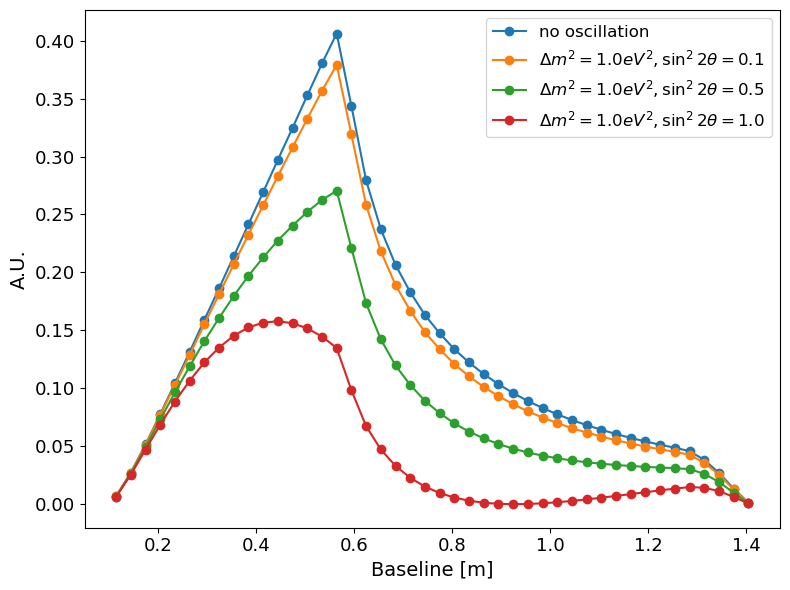

In [63]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(cent0, cont0, 'o-', label='no oscillation')
ax.plot(cent1, cont1, 'o-', label=r'$\Delta m^2=1.0 eV^2, \sin^22\theta=0.1$')
ax.plot(cent2, cont2, 'o-', label=r'$\Delta m^2=1.0 eV^2, \sin^22\theta=0.5$')
ax.plot(cent3, cont3, 'o-', label=r'$\Delta m^2=1.0 eV^2, \sin^22\theta=1.0$')
ax.set_xlabel('Baseline [m]', fontsize=14)
ax.set_ylabel("A.U.", fontsize=14)
ax.tick_params(labelsize=13)
ax.legend(fontsize=12)
plt.tight_layout()

In [101]:
gen1._set_dm2(0.0)
gen1._set_sin2theta_square(0.0)
edge0, cont0 = gen1.fill_rateVSbaseline_histogram(0.75, step_bl=0.03)
cent0 = (edge0[:-1]+edge0[1:]) / 2.

gen1._set_dm2(0.1)
gen1._set_sin2theta_square(0.5)
edge1, cont1 = gen1.fill_rateVSbaseline_histogram(0.75, step_bl=0.03)
cent1 = (edge1[:-1]+edge1[1:]) / 2.
print(r'Oscillation length for $\Delta m^2$ = 0.1 $eV^2$ is ' + f'{gen1._get_oscillation_length():.3f} m.')

gen1._set_dm2(1.0)
gen1._set_sin2theta_square(0.5)
edge2, cont2 = gen1.fill_rateVSbaseline_histogram(0.75, step_bl=0.03)
cent2 = (edge2[:-1]+edge2[1:]) / 2.
print(r'Oscillation length for $\Delta m^2$ = 1.0 $eV^2$ is ' + f'{gen1._get_oscillation_length():.3f} m.')

gen1._set_dm2(5.0)
gen1._set_sin2theta_square(0.5)
edge3, cont3 = gen1.fill_rateVSbaseline_histogram(0.75, step_bl=0.03)
cent3 = (edge3[:-1]+edge3[1:]) / 2.
print(r'Oscillation length for $\Delta m^2$ = 5.0 $eV^2$ is ' + f'{gen1._get_oscillation_length():.3f} m.')

gen1._set_dm2(10.0)
gen1._set_sin2theta_square(0.5)
edge4, cont4 = gen1.fill_rateVSbaseline_histogram(0.75, step_bl=0.03)
cent4 = (edge4[:-1]+edge4[1:]) / 2.
print(r'Oscillation length for $\Delta m^2$ = 10.0 $eV^2$ is ' + f'{gen1._get_oscillation_length():.3f} m.')

gen1._set_dm2(50.0)
gen1._set_sin2theta_square(0.5)
edge5, cont5 = gen1.fill_rateVSbaseline_histogram(0.75, step_bl=0.03)
cent5 = (edge5[:-1]+edge5[1:]) / 2.
print(r'Oscillation length for $\Delta m^2$ = 50.0 $eV^2$ is ' + f'{gen1._get_oscillation_length():.3f} m.')

gen1._set_dm2(100.0)
gen1._set_sin2theta_square(0.5)
edge6, cont6 = gen1.fill_rateVSbaseline_histogram(0.75, step_bl=0.03)
cent6 = (edge6[:-1]+edge6[1:]) / 2.
print(r'Oscillation length for $\Delta m^2$ = 100.0 $eV^2$ is ' + f'{gen1._get_oscillation_length():.3f} m.')

Oscillation length for $\Delta m^2$ = 0.1 $eV^2$ is 18.553 m.
Oscillation length for $\Delta m^2$ = 1.0 $eV^2$ is 1.855 m.
Oscillation length for $\Delta m^2$ = 5.0 $eV^2$ is 0.371 m.
Oscillation length for $\Delta m^2$ = 10.0 $eV^2$ is 0.186 m.
Oscillation length for $\Delta m^2$ = 50.0 $eV^2$ is 0.037 m.
Oscillation length for $\Delta m^2$ = 100.0 $eV^2$ is 0.019 m.


In [102]:
h0_event = histlite.Hist(edge0, cont0)
h1_event = histlite.Hist(edge1, cont1)
h2_event = histlite.Hist(edge2, cont2)
h3_event = histlite.Hist(edge3, cont3)
h4_event = histlite.Hist(edge4, cont4)
h5_event = histlite.Hist(edge5, cont5)
h6_event = histlite.Hist(edge6, cont6)

In [103]:
h0_event_norm = h0_event.normalize()
h1_event_norm = h1_event.normalize()
h2_event_norm = h2_event.normalize()
h3_event_norm = h3_event.normalize()
h4_event_norm = h4_event.normalize()
h5_event_norm = h5_event.normalize()
h6_event_norm = h6_event.normalize()

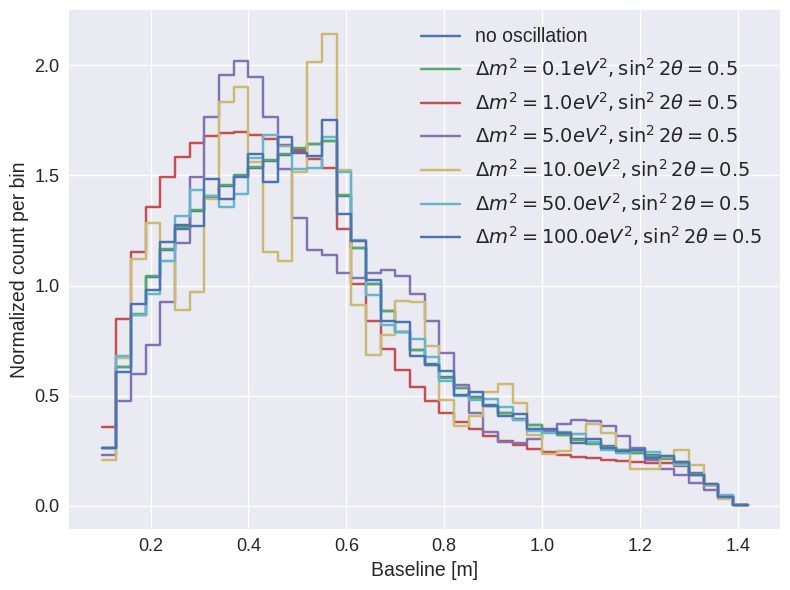

In [104]:
plt.style.use('seaborn-v0_8')

fig, ax = plt.subplots(figsize=(8, 6))
histlite.plot1d(ax, h0_event_norm, label='no oscillation')
histlite.plot1d(ax, h1_event_norm, label=r'$\Delta m^2=0.1 eV^2, \sin^22\theta=0.5$')
histlite.plot1d(ax, h2_event_norm, label=r'$\Delta m^2=1.0 eV^2, \sin^22\theta=0.5$')
histlite.plot1d(ax, h3_event_norm, label=r'$\Delta m^2=5.0 eV^2, \sin^22\theta=0.5$')
histlite.plot1d(ax, h4_event_norm, label=r'$\Delta m^2=10.0 eV^2, \sin^22\theta=0.5$')
histlite.plot1d(ax, h5_event_norm, label=r'$\Delta m^2=50.0 eV^2, \sin^22\theta=0.5$')
histlite.plot1d(ax, h6_event_norm, label=r'$\Delta m^2=100.0 eV^2, \sin^22\theta=0.5$')
ax.legend(fontsize=14)
ax.set_xlabel('Baseline [m]', fontsize=14)
ax.set_ylabel('Normalized count per bin', fontsize=14)
ax.tick_params(labelsize=13)
plt.tight_layout()

In [62]:
gen1._set_dm2(0.0)
gen1._set_sin2theta_square(0.0)
edge0, cont0 = gen1.fill_baseline_histogram()
cent0 = (edge0[:-1]+edge0[1:]) / 2.
h0_vol = histlite.Hist(edge0, cont0)
h0_vol_norm = h0_vol.normalize()

#bls = np.arange(*gen1._get_baseline_range(), 0.01)
bls = np.arange(gen1.baseline_min, gen1.baseline_max, 0.01)
flux_scaling_factor = gen1.flux_scaling(bls)
flux_scaling_factor_max = gen1.flux_scaling(gen1.baseline_min)

Text(0.5, 1.0, 'No oscillation')

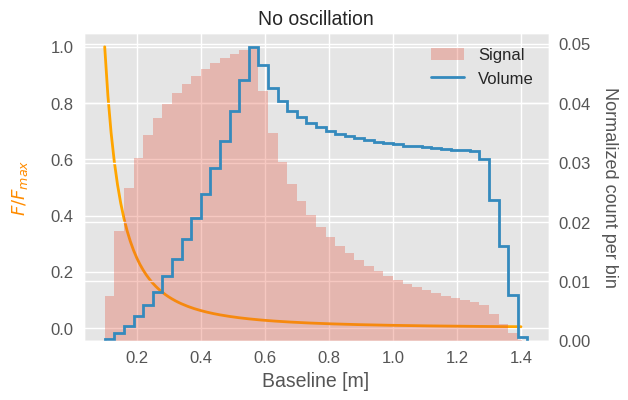

In [66]:
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(6, 4))
ax.tick_params(color='orange', labelsize=12)
ax.set_ylabel(r'$F/F_{max}$', rotation=90, labelpad=15, fontsize=13, color='darkorange')
ax.set_xlabel('Baseline [m]', fontsize=14)

ax1 = ax.twinx()
#histlite.plot1d(ax1, h0_event_norm, label='event rate')
ax1.stairs(h1.values/np.max(h1.values)*np.max(h0_vol.values), h1.bins[0], fill=True, alpha=0.3, label='Signal')
ax1.stairs(h0_vol.values, h0_vol.bins[0], fill=False, linewidth=2, alpha=1.0, label='Volume')
#histlite.plot1d(ax1, h0_vol, label='volume')
ax1.tick_params(labelsize=12,)
ax1.set_ylabel('Normalized count per bin', fontsize=13, rotation=270, labelpad=20)
ax1.legend(fontsize=12)

ax.plot(bls, flux_scaling_factor/flux_scaling_factor_max, '-', lw=2, color='orange')

ax.set_title('No oscillation', fontsize=14)

In [106]:
gen1._set_dm2(0.0)
gen1._set_sin2theta_square(0.0)
edge0, cont0 = gen1.fill_rateVSbaseline_histogram(0.75, step_z=0.01, step_r=0.01)
cent0 = (edge0[:-1]+edge0[1:]) / 2.

gen1._set_dm2(0.0)
gen1._set_sin2theta_square(0.0)
edge1, cont1 = gen1.fill_rateVSbaseline_histogram(0.75, step_z=0.001, step_r=0.001)
cent1 = (edge1[:-1]+edge1[1:]) / 2.


gen1._set_dm2(0.0)
gen1._set_sin2theta_square(0.0)
edge2, cont2 = gen1.fill_rateVSbaseline_histogram(0.75, step_z=0.0001, step_r=0.0001)
cent2 = (edge2[:-1]+edge2[1:]) / 2.


In [107]:
h0 = histlite.Hist(edge0, cont0)
h1 = histlite.Hist(edge1, cont1)
h2 = histlite.Hist(edge2, cont2)

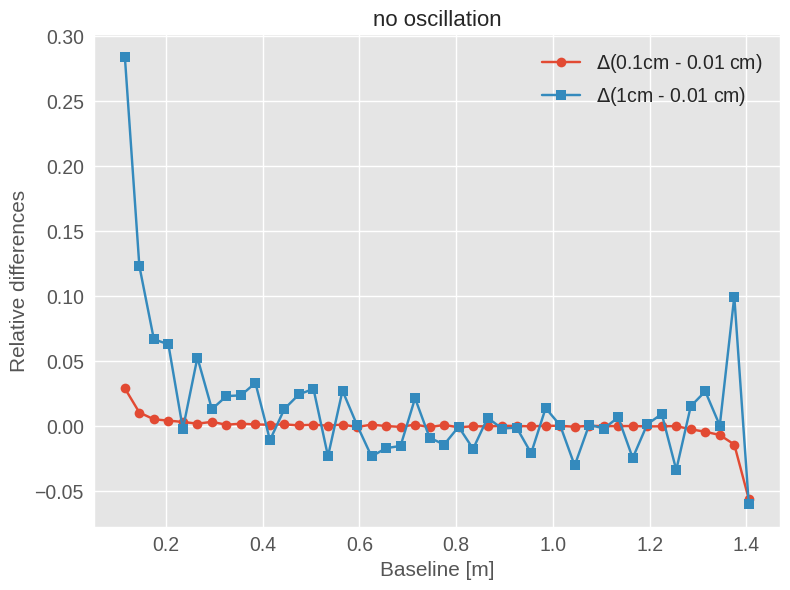

In [111]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(cent2, (cont1-cont2)/cont2, 'o-', label=r'$\Delta$(0.1cm - 0.01 cm)')
ax.plot(cent2, (cont0-cont2)/cont2, 's-', label=r'$\Delta$(1cm - 0.01 cm)')
ax.legend(fontsize=14)
ax.set_xlabel('Baseline [m]', fontsize=15)
ax.set_ylabel('Relative differences', fontsize=15)
ax.tick_params(labelsize=14)
ax.grid(True)
ax.set_title('no oscillation', fontsize=16)
plt.tight_layout()



In [4]:
import MC_generator
import importlib
importlib.reload(MC_generator)

# no oscillation:
dm2, sin2theta_square = 0., 0.

import MC_generator
gen1 = MC_generator.MC_generator(source_nEXO, det_nEXO, dm2=dm2, sin2theta_square=sin2theta_square, int_type='CC'); 

A Cr51 hot neutrino source with nominal 100000.0 in xx years with neutrino energies [0.75] and branch ratios [1.0] is created.


In [5]:
gen1._set_dm2(0.0)
gen1._set_sin2theta_square(0.0)
#gen1.pre_calculate_2Dmap(0.75)
#gen1.load_2Dmap('../../jobs/PDFs/nonoscillation_probability_2DradiusZ_1mmbin.txt')

In [47]:
gen1.load_even_rate_file()

In [49]:
gen1.osc_event_rate_func(0.1, 0.02)[0]

/var/tmp/yu47/ipykernel_3971300/1621530277.py:1: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  gen1.osc_event_rate_func(0.1, 0.02)[0]


9821.751712317327

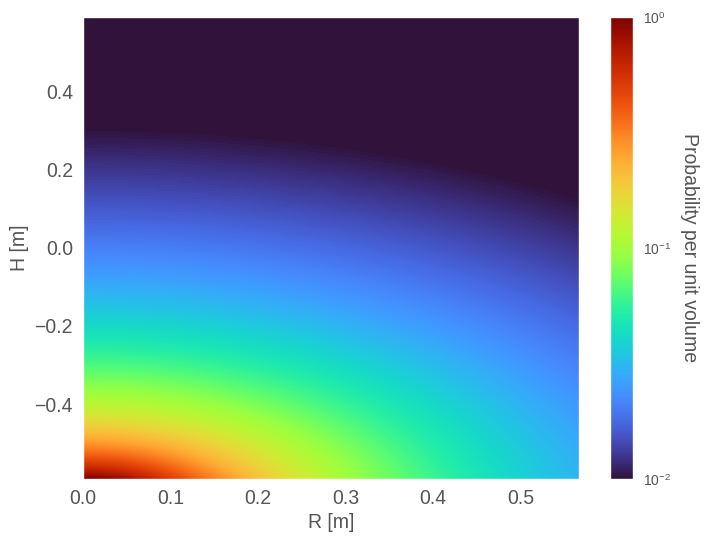

In [114]:
from matplotlib import colors
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(gen1.maps, aspect='auto', extent=[0, gen1.det.radius, -gen1.det.height/2., gen1.det.height/2.], cmap='turbo', norm=colors.LogNorm(1e-2, vmax=1))
ax.grid(False)
cb = plt.colorbar(im, ax=ax)
ax.set_xlabel('R [m]', fontsize=14)
ax.set_ylabel('H [m]', fontsize=14)
ax.tick_params(labelsize=14)
cb.set_label('Probability per unit volume', fontsize=14, rotation=270, labelpad=20)

In [83]:
sin2 = 0.1
hists = []
for dm2 in [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]:

    gen1._set_dm2(dm2)
    gen1._set_sin2theta_square(sin2)

    step_bl = 0.001
    baseline_edges = np.arange(gen1.baseline_min, gen1.baseline_max+step_bl, step_bl)
    baseline_cents = (baseline_edges[1:]+baseline_edges[:-1]) /2.
    counts = []
    for bl in baseline_cents:
        counts.append( gen1.shell_integral(bl)[0] )
         
    h0 = histlite.Hist(baseline_edges, counts)
    
    step_bl = 0.03
    baseline_edges_new = np.arange(baseline_edges[0], baseline_edges[-1], step_bl)
    baseline_edges_new = np.append(baseline_edges_new, baseline_edges[-1])
    h1 = h0.rebin(0, baseline_edges_new)
    
    step_bl = 0.05
    baseline_edges_new1 = np.arange(baseline_edges[0], baseline_edges[-1], step_bl)
    baseline_edges_new1 = np.append(baseline_edges_new1, baseline_edges[-1])
    h2 = h0.rebin(0, baseline_edges_new1)
    
    h1_norm = h1.normalize()
    h1_scaled = histlite.Hist(h1_norm.bins[0], h1_norm.values*0.03*gen1.n_events)
    print(np.sum(h1_scaled.values))

    h2_norm = h2.normalize()
    h2_scaled = histlite.Hist(h2_norm.bins[0], h2_norm.values*0.05*gen1.n_events)
    print(np.sum(h2_scaled.values))

    hists.append([h0, h1_scaled, h2_scaled])



9822.870713632557
9822.22845462954
9822.829667078002
9822.225830496258
9822.878493735532
9822.229003742317
9822.847997074336
9822.227017057781
9822.877672876046
9822.229159078599
9822.836850891175
9822.22639936946


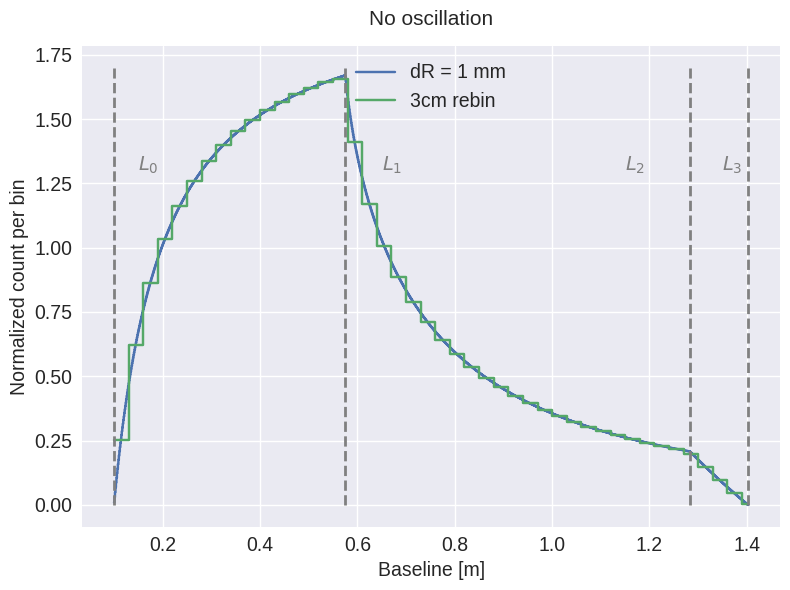

In [61]:
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(8, 6))
histlite.plot1d(ax, h0.normalize(), label='dR = 1 mm')
histlite.plot1d(ax, h1.normalize(), label='3cm rebin')
ax.vlines(np.sqrt((-det_nEXO.height/2.-source_nEXO.position[2])**2 + det_nEXO.radius**2), 0, 1.7, color='gray', lw=2, linestyle='--')
ax.vlines(np.sqrt((det_nEXO.height/2.-source_nEXO.position[2])**2 + det_nEXO.radius**2), 0, 1.7, color='gray', lw=2, linestyle='--')
ax.vlines(det_nEXO.height/2.-source_nEXO.position[2], 0, 1.7, color='gray', lw=2, linestyle='--')
ax.vlines(-det_nEXO.height/2.-source_nEXO.position[2], 0, 1.7, color='gray', lw=2, linestyle='--')
ax.text(0.15, 1.30, r'$L_0$', fontsize=14, color='gray')
ax.text(0.65, 1.30, r'$L_1$', fontsize=14, color='gray')
ax.text(1.15, 1.30, r'$L_2$', fontsize=14, color='gray')
ax.text(1.35, 1.30, r'$L_3$', fontsize=14, color='gray')
ax.set_xlabel('Baseline [m]', fontsize=14)
ax.set_ylabel('Normalized count per bin', fontsize=14)
ax.legend(fontsize=14, loc='upper center')
ax.tick_params(labelsize=14)
ax.set_title('No oscillation', fontsize=15, pad=15)
plt.tight_layout()
#ax.vlines(np.sqrt((det_nEXO.height/2.-source_nEXO.position[2])**2 + det_nEXO.radius**2), 0, 1.7, color='gray', lw=2)

9822.873732997608
9822.228648776601


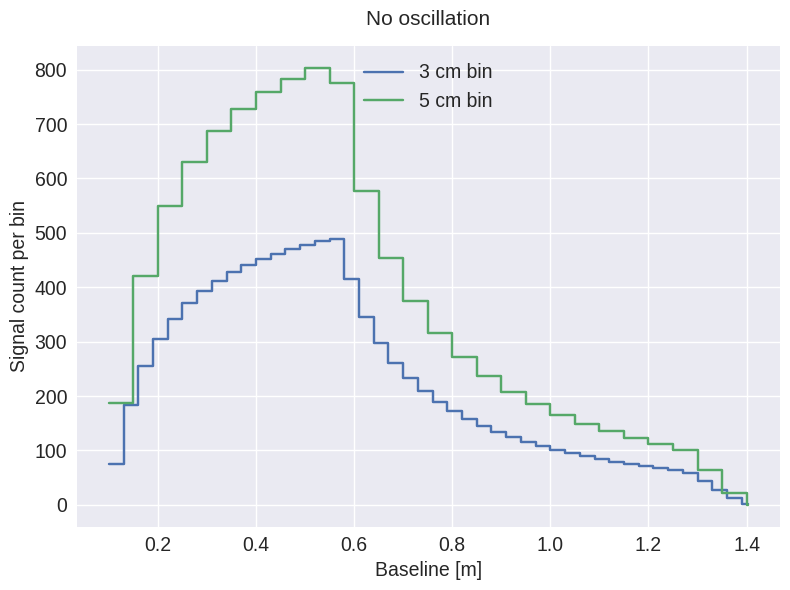

In [82]:



plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(8, 6))
histlite.plot1d(ax, h1_scaled, label='3 cm bin')
histlite.plot1d(ax, h2_scaled, label='5 cm bin')
ax.set_xlabel('Baseline [m]', fontsize=14)
ax.set_ylabel('Signal count per bin', fontsize=14)
ax.legend(fontsize=14, loc='upper center')
ax.tick_params(labelsize=14)
ax.set_title('No oscillation', fontsize=15, pad=15)
plt.tight_layout()
#ax.vlines(np.sqrt((det_nEXO.height/2.-source_nEXO.position[2])**2 + det_nEXO.radius**2), 0, 1.7, color='gray', lw=2)

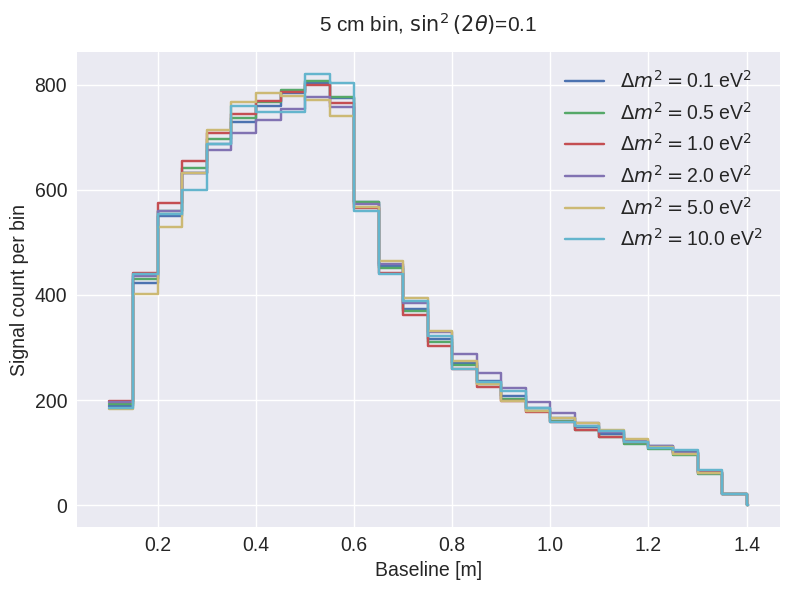

In [99]:


dm2 = [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]
binwidth = ['1 mm bin', '3 cm bin', '5 cm bin']
idx = 2
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(8, 6))
for i, hs in enumerate(hists):
    histlite.plot1d(ax, hs[idx], label=r'$\Delta m^2=$'+f'{dm2[i]:.1f}'+r' eV$^2$')
ax.set_title(binwidth[idx]+r', $\sin^2(2\theta)$'+f'={sin2:.1f}', fontsize=15, pad=15)
ax.set_xlabel('Baseline [m]', fontsize=14)
ax.set_ylabel('Signal count per bin', fontsize=14)
ax.legend(fontsize=14, loc='best')
ax.tick_params(labelsize=14)
#ax.set_title('No oscillation', fontsize=15, pad=15)
plt.tight_layout()
#ax.vlines(np.sqrt((det_nEXO.height/2.-source_nEXO.position[2])**2 + det_nEXO.radius**2), 0, 1.7, color='gray', lw=2)

In [4]:
def small_Rstep_integral(gen, dm2, sin2, step_bl=0.001, ):
    baseline_edges = np.arange(gen.baseline_min, gen.baseline_max+step_bl, step_bl)
    baseline_cents = (baseline_edges[1:]+baseline_edges[:-1]) /2.
    counts = []
    for bl in baseline_cents:
        counts.append( gen.shell_integral(bl, dm2, sin2)[0] )
         
    h0 = histlite.Hist(baseline_edges, counts)
    return h0

gen1._set_dm2(0.0)
gen1._set_sin2theta_square(0.0)
h_noosc = small_Rstep_integral(gen1, 0.0, 0.0)

In [5]:
print(gen1.n_events_noosc)

5924.611265866583


In [37]:
counts = np.zeros((100, 100))
for i, dm2 in enumerate(np.logspace(-2, 2, 100)):
    print(i, dm2)
    for j, sin2 in enumerate(np.logspace(-2, 0, 100)):
        h0 = small_Rstep_integral(gen1, dm2, sin2)
        #counts[i, j] = np.sum(h0.values)
        counts[100-1-i, j] = np.sum(h0.values)


0 0.01
1 0.010974987654930561
2 0.012045035402587823
3 0.013219411484660288
4 0.014508287784959394
5 0.015922827933410922
6 0.01747528400007684
7 0.019179102616724886
8 0.02104904144512021
9 0.023101297000831605
10 0.025353644939701114
11 0.027825594022071243
12 0.030538555088334154
13 0.033516026509388425
14 0.03678379771828634
15 0.040370172585965536
16 0.044306214575838825
17 0.04862601580065353
18 0.0533669923120631
19 0.05857020818056667
20 0.06428073117284322
21 0.07054802310718646
22 0.0774263682681127
23 0.08497534359086446
24 0.093260334688322
25 0.10235310218990264
26 0.11233240329780277
27 0.12328467394420665
28 0.13530477745798075
29 0.1484968262254465
30 0.16297508346206444
31 0.1788649529057435
32 0.19630406500402714
33 0.21544346900318845
34 0.23644894126454083
35 0.25950242113997374
36 0.2848035868435802
37 0.3125715849688237
38 0.34304692863149194
39 0.37649358067924693
40 0.41320124001153385
41 0.4534878508128584
42 0.49770235643321115
43 0.5462277217684343
44 0.59948

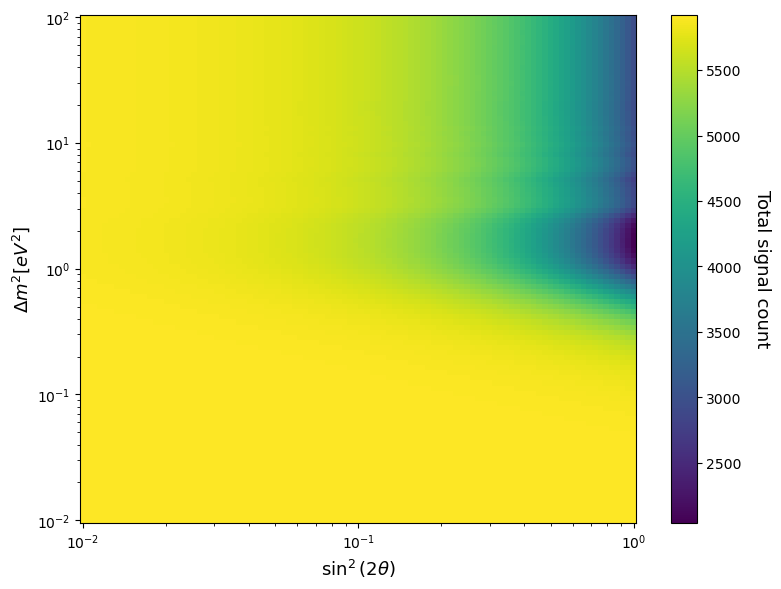

In [39]:
from matplotlib import colors

gen1._set_dm2(0.0)
gen1._set_sin2theta_square(0.0)
h = small_Rstep_integral(gen1, 0.0, 0.0)
factor = gen1.n_events / np.sum(h.values)

fig, ax = plt.subplots(figsize=(8, 6))
sin2_arr = np.logspace(-2, 0, 100)
dm2_arr = np.logspace(-2, 2, 100)
im = ax.pcolormesh(sin2_arr, dm2_arr, counts[::-1, :]*factor, )
#im = ax.imshow(counts*factor, aspect='auto', extent=[1e-2, 1e0, 1e-2, 1e2], )
#im = ax.imshow(counts[::-1, :]*factor, aspect='auto', extent=[1e-2, 1e0, 1e-2, 1e2], norm=colors.LogNorm(vmin=np.min(counts*factor), vmax=np.max(counts*factor)))
cb = plt.colorbar(im, ax=ax)
ax.set_xlabel(r'$\sin^2(2\theta)$', fontsize=13)
ax.set_ylabel(r"$\Delta m^2 [eV^2]$", fontsize=13)
ax.loglog()
cb.set_label('Total signal count', fontsize=13, labelpad=21, rotation=270)
plt.tight_layout()
plt.savefig('../plots/SignalCountsVSdm2sin2.pdf')

In [41]:
from scipy.interpolate import interp2d
rates = counts[::-1, :] * factor
f = interp2d(sin2_arr, dm2_arr, rates)

/var/tmp/yu47/ipykernel_4010680/494882454.py:3: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  f = interp2d(sin2_arr, dm2_arr, rates)


In [14]:
sin2new, dm2new = 0.1, 1.0
rate = f(sin2new, dm2new)

/var/tmp/yu47/ipykernel_3971300/3982851804.py:2: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  rate = f(sin2new, dm2new)


In [15]:
print(rate)

[9272.75857009]


In [42]:
import h5py as h5
outfilename = '../data/event_rate_bl10cm_Ev750keV.h5'
with h5.File(outfilename, 'w') as f:
    f.create_dataset('x-axis', data=sin2_arr)
    f.create_dataset('y-axis', data=dm2_arr)
    f.create_dataset('rate',   data=rates)

In [54]:
gen1.load_even_rate_file()

In [55]:
gen1.generate_nooscillation_asimov_dataset()

Expected event number is 9822.174058283164.


NameError: name 'n_event0' is not defined

In [7]:
gen1._set_dm2(0.0)
gen1._set_sin2theta_square(0.0)
h0 = small_Rstep_integral(gen1, 0.0, 0.0)
print(np.sum(h0.values))


gen_LZ._set_dm2(0.0)
gen_LZ._set_sin2theta_square(0.0)
h0 = small_Rstep_integral(gen_LZ, 0.0, 0.0)
print(np.sum(h0.values))

494.6204748647344
Radius is out of range [1.000, 2.478].
123.38156824593642


In [35]:
import MC_generator
import importlib
importlib.reload(MC_generator)

# no oscillation:
dm2, sin2theta_square = 0., 0.

import MC_generator
gen1 = MC_generator.MC_generator(source_nEXO, det_nEXO, dm2=dm2, sin2theta_square=sin2theta_square, int_type='CC'); 
print(gen1.n_events)

A Cr51 hot neutrino source with nominal 100000.0 in xx years with neutrino energies [0.75] and branch ratios [1.0] is created.
Pre-scaling event count: 12518.000
Scaling exposure time: 100.000, 100.000
Geometry factor: 494.620, 123.382
Activity: 5000000.0, 5000000.0
Cross section: 2.672e-43, 2.672e-43
Pre-scaling event count: 12518.000
Scaling exposure time: 100.000, 100.000
Geometry factor: 494.620, 123.382
Activity: 5000000.0, 5000000.0
Cross section: 3.154e-44, 2.672e-43
5924.611265866583


In [25]:
R_nEXO1 = gen1.expected_rate_cylindrical_integral(0.75, 0.0, 0.0)[0]
R_LZ1 = gen_LZ.expected_rate_cylindrical_integral(0.75, 0.0, 0.0)[0]
print(R_nEXO1, R_LZ1)

3.1077906395032784 0.7752292484525157


In [26]:

R_nEXO2 = gen1.expected_rate_spheric_integral(0.75, 0.0, 0.0)[0]
print(R_nEXO2)


3.1077906402472166


In [23]:
R_LZ2 = gen_LZ.expected_rate_spheric_integral(0.75, 0.0, 0.0)

TypeError: MC_generator.expected_rate_spheric_integral() takes 4 positional arguments but 6 were given

In [27]:
from xsection import xsection
xsec = xsection()

In [30]:
xsec.total_xsec_CC(0.75) / xsec.total_xsec_nuescatter(0.75) * 4

0.4722424646959074

In [31]:
gen1.scale_counts()


5924.611265866583

(0.6666666666666666, 7.401486830834376e-15)
(0.6508923395776092, 7.226356619511977e-15)


In [7]:
gen1.load_even_rate_file()

5924.604746649475
5859.784002812117


In [48]:
import MC_generator
import importlib
importlib.reload(MC_generator)

# no oscillation:
dm2, sin2theta_square = 0., 0.

import MC_generator
gen1 = MC_generator.MC_generator(source_nEXO, det_nEXO, dm2=dm2, sin2theta_square=sin2theta_square, int_type='CC'); 

gen1.load_even_rate_file()

A Cr51 hot neutrino source with nominal 100000.0 in xx years with neutrino energies [0.75] and branch ratios [1.0] is created.


In [49]:
h0 = gen1.generate_asimov_dataset(data_dm2=0.0, data_sin2=0.0)

In [50]:
h1 = gen1.generate_asimov_dataset(data_dm2=1.0, data_sin2=0.1)

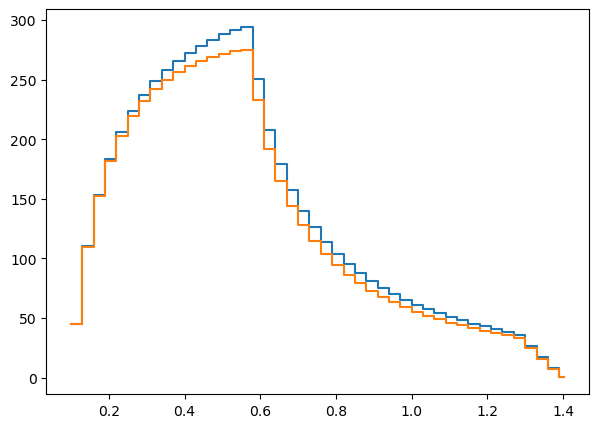

In [51]:
fig, ax = plt.subplots(figsize=(7, 5))
histlite.plot1d(ax, h0)
histlite.plot1d(ax, h1)

In [6]:
dchi2 = np.zeros((100, 100))
for i, dm2 in enumerate(np.logspace(-2, 2, 100)):
    print(i, dm2)
    for j, sin2 in enumerate(np.logspace(-2, 0, 100)):
        h = gen1.generate_asimov_dataset(dm2, sin2, )
        N = np.sum(h.values)
        N0 = gen1.n_events_noosc
        sigma0 = np.sqrt(N0) 
        dchi2[100-1-i, j] = (N-N0)**2 / sigma0**2

0 0.01
1 0.010974987654930561
2 0.012045035402587823
3 0.013219411484660288
4 0.014508287784959394
5 0.015922827933410922
6 0.01747528400007684
7 0.019179102616724886
8 0.02104904144512021
9 0.023101297000831605
10 0.025353644939701114
11 0.027825594022071243
12 0.030538555088334154
13 0.033516026509388425
14 0.03678379771828634
15 0.040370172585965536
16 0.044306214575838825
17 0.04862601580065353
18 0.0533669923120631
19 0.05857020818056667
20 0.06428073117284322
21 0.07054802310718646
22 0.0774263682681127
23 0.08497534359086446
24 0.093260334688322
25 0.10235310218990264
26 0.11233240329780277
27 0.12328467394420665
28 0.13530477745798075
29 0.1484968262254465
30 0.16297508346206444
31 0.1788649529057435
32 0.19630406500402714
33 0.21544346900318845
34 0.23644894126454083
35 0.25950242113997374
36 0.2848035868435802
37 0.3125715849688237
38 0.34304692863149194
39 0.37649358067924693
40 0.41320124001153385
41 0.4534878508128584
42 0.49770235643321115
43 0.5462277217684343
44 0.59948

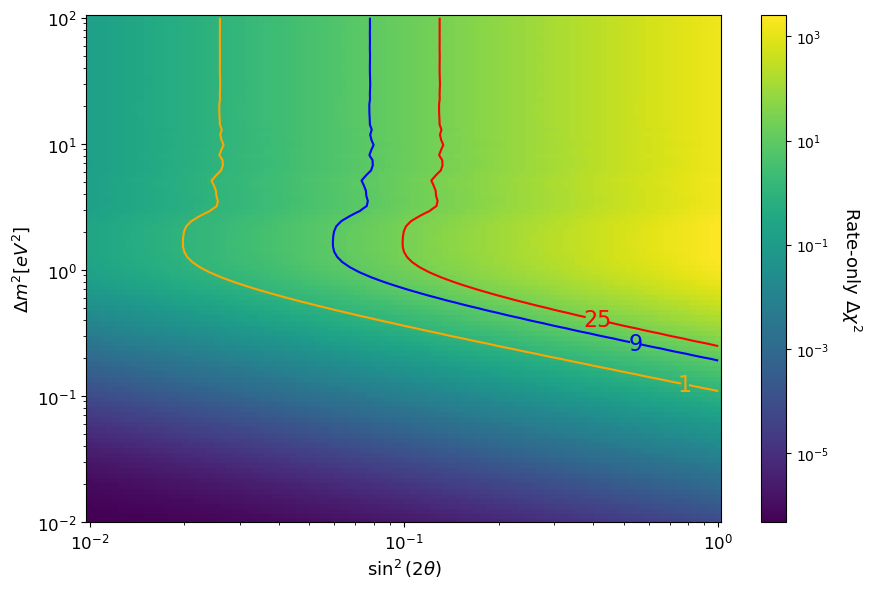

In [32]:
from matplotlib import colors

fig, ax = plt.subplots(figsize=(9, 6))
sin2_arr = np.logspace(-2, 0, 100)
dm2_arr = np.logspace(-2, 2, 100)
im = ax.pcolormesh(sin2_arr, dm2_arr, dchi2[::-1, :], norm=colors.LogNorm(vmin=np.min(dchi2), vmax=np.max(dchi2)))
cb = plt.colorbar(im, ax=ax)

X, Y = np.meshgrid(sin2_arr, dm2_arr)
CS = ax.contour(X, Y, dchi2[::-1, :], levels=[1,  9,  25], colors=['orange', 'blue', 'red', ])
ax.clabel(CS, inline=True, fontsize=16)

ax.tick_params(labelsize=12)
ax.set_xlabel(r'$\sin^2(2\theta)$', fontsize=13)
ax.set_ylabel(r"$\Delta m^2 [eV^2]$", fontsize=13)
ax.loglog()
cb.set_label(r'Rate-only $\Delta \chi^2$', fontsize=13, labelpad=24, rotation=270)
plt.tight_layout()
plt.savefig('../plots/noosc_dataset_rateonly_dchi2_3cmbinwidth.pdf')